In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Objective
def objective_function(var1, var2):
    return -np.exp(-0.5 * (var1 * var2 - 0.75)**2 - 2 * (var1 - 1.5)**2)

In [19]:
# Gradient
def gradient(variables, penalty_factor):
    var1, var2 = variables
    constraint_val = 1 / (var1 + 1 / 3) - var2 - 0.5
    grad_var1 = -(var2 * (var1 * var2 - 0.75) + 4 * (var1 - 1.5)) * objective_function(var1, var2) - 2 * penalty_factor * constraint_val / (var1 + 1 / 3)**2
    grad_var2 = -2 * penalty_factor * constraint_val - var1 * (var1 * var2 - 0.75) * objective_function(var1, var2)
    return np.array([grad_var1, grad_var2])

In [20]:
# Hessian
def hessian(variables, penalty_factor):
    var1, var2 = variables
    exponent_term = -0.5 * (var1 * var2 - 0.75)**2 - 2 * (var1 - 1.5)**2
    constraint_val = 1 / (var1 + 1/3) - var2 - 0.5
    expA = np.exp(exponent_term)
    H11 = expA * (-var2 * (var1 * var2 - 0.75) - 4 * (var1 - 1.5)) * (var2 * (var1 * var2 - 0.75) + 4 * (var1 - 1.5)) \
          + expA * (var2**2 + 4) + (2 * penalty_factor) / (var1 + 1/3)**4 + (4 * penalty_factor * constraint_val) / (var1 + 1/3)**3
    H12 = expA * (-var1 * (var1 * var2 - 0.75)) * (var2 * (var1 * var2 - 0.75) + 4 * (var1 - 1.5)) \
          + expA * (2 * var1 * (var1 * var2 - 0.75)) + (2 * penalty_factor) / (var1 + 1/3)**2
    H22 = expA * var1**2 * (1 - (var1 * var2 - 0.75)**2) + 2 * penalty_factor
    return np.array([[H11, H12], [H12, H22]])

In [21]:
# Newton's Method
def newton_method(objective_gradient, objective_hessian, initial_guess, tolerance):
    current_guess = initial_guess
    for i in range(25):
        function_gradient = objective_gradient(current_guess)
        function_hessian = objective_hessian(current_guess)
        delta = np.linalg.solve(function_hessian, -function_gradient)
        next_guess = current_guess + delta
        if np.linalg.norm(delta) < tolerance:
            print(f'Stopped after {i+1} iterations due to convergence.')
            return next_guess
        current_guess = next_guess
    print('Did not converge')
    return np.full_like(initial_guess, np.nan)

In [22]:
# Plotting
def plot_contour_and_constraint(var1_values, var2_values):
    grid_var1, grid_var2 = np.meshgrid(var1_values, var2_values)
    function_values = objective_function(grid_var1, grid_var2)
    plt.contour(grid_var1, grid_var2, function_values, levels=20)
    plt.xlabel('var1')
    plt.ylabel('var2')
    plt.title('Contour Plot')
    var1_constraint = np.linspace(0, 3, 100)
    var2_constraint = 1 / (var1_constraint + 1/3) - 1/2
    plt.plot(var1_constraint, var2_constraint, 'b-', linewidth=1.5, label='Constraint')

The initial point is [1.5, 0.75]
Stopped after 5 iterations due to convergence.
Iteration 1, penalty_factor = 0.1, Optimal [var1, var2] = [1.5002098662887344, 0.46255451696447886]
Stopped after 5 iterations due to convergence.
Iteration 2, penalty_factor = 0.5, Optimal [var1, var2] = [1.495199728399847, 0.3587979395205908]
Stopped after 5 iterations due to convergence.
Iteration 3, penalty_factor = 2.5, Optimal [var1, var2] = [1.4671357397223685, 0.1814346712798106]
Stopped after 4 iterations due to convergence.
Iteration 4, penalty_factor = 12.5, Optimal [var1, var2] = [1.4435231968477586, 0.09208391072626858]
Stopped after 4 iterations due to convergence.
Iteration 5, penalty_factor = 62.5, Optimal [var1, var2] = [1.4371336965651396, 0.07081724603238418]
Stopped after 3 iterations due to convergence.
Iteration 6, penalty_factor = 312.5, Optimal [var1, var2] = [1.4357506954477306, 0.06646842760376369]
Stopped after 1 iterations due to convergence.
Iteration 7, penalty_factor = 1562.5,

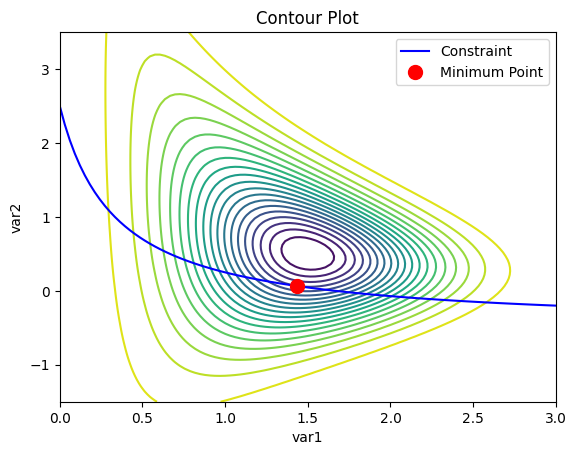

In [23]:
# Test 
def test_optimization():
    # Ranges
    var1_values = np.linspace(0, 3, 100)
    var2_values = np.linspace(-1.5, 3.5, 100)
    
    # Plot
    plot_contour_and_constraint(var1_values, var2_values)
    
    # Initial Point
    initial_point = np.array([1.5, 0.75])
    print(f'The initial point is [{initial_point[0]}, {initial_point[1]}]')
    penalty_factor = 0.1

    for i in range(20):
        optimal_point = newton_method(lambda variables: gradient(variables, penalty_factor), lambda variables: hessian(variables, penalty_factor), initial_point, 1e-3)
        print(f'Iteration {i+1}, penalty_factor = {penalty_factor}, Optimal [var1, var2] = [{optimal_point[0]}, {optimal_point[1]}]')
        penalty_factor *= 5  
        initial_point = optimal_point 
    
    print(f'Minimum point is [{optimal_point[0]}, {optimal_point[1]}]')
    
    # Mark min
    plt.plot(optimal_point[0], optimal_point[1], 'ro', markersize=10, markerfacecolor='r', label='Minimum Point')
    plt.legend(loc='best')
    plt.show()

# Run
test_optimization()

###Similar to number 1